<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173_Fall2025/blob/main/F25_Class_05_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 5: Natural Language Processing**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 4 Material

* Part 5.1: Introduction to Hugging Face
* Part 5.2: Hugging Face Tokenizers
* **Part 5.3: Hugging Face Datasets**
* Part 5.4: Training Hugging Face models

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


Make sure your GMAIL address is included as the last line in the output above.

## **Hugging Face Datasets**

**Hugging Face Datasets** are useful for natural language processing (NLP). The Hugging Face library provides functions that allow you to navigate and obtain these data sets. When we access Hugging Face data sets, the data is in a format specific to Hugging Face. In this part, we will explore this format and see how to convert it to Pandas or TensorFlow data.

#### **Key Features**

* **Wide Variety:** The Hugging Face Hub hosts datasets for numerous tasks, such as natural language processing (NLP), computer vision, and audio processing.

* **Easy Access:** Datasets can be easily downloaded and pre-processed with simple commands, making it convenient for researchers and practitioners.

* **Efficient Data Handling:** The library supports efficient data pre-processing, caching, and memory-mapping, allowing users to work with large datasets without running into memory limitations.

* **Interoperability:** Built-in support for interoperability with libraries like NumPy, Pandas, and Polars.

#### **Usefulness for Computational Biologists**

* **Access to Diverse Datasets:** Computational biologists can access a wide range of datasets relevant to their research, such as genomic sequences, protein structures, and biological literature.

* **Data Pre-processing:** The library provides tools for efficient data pre-processing, enabling researchers to clean, transform, and prepare their data for analysis and modeling.

* **Integration with Machine Learning Frameworks:** Seamless integration with popular machine learning frameworks allows computational biologists to apply advanced machine learning techniques to their data

### Install Hugging Face Datasets

Before we can beging, we need to install Hugging Face datasets by running the code in the next cell.


In [ ]:
# Install Hugging Face Datasets

!pip install transformers > /dev/null
!pip install transformers[sentencepiece] > /dev/null
!pip install datasets  > /dev/null
!pip install huggingface_hub  > /dev/null

### Demonstration 1: List Datasets

Hugging Face hub currently contains 327422 datasets. To narrow our focus when searching for particular datasets, we can use `keywords` as illustrated by the code below. The code will take a few minutes to run, so please be patient...

In [ ]:
from huggingface_hub import HfApi
from datasets import DatasetInfo, get_dataset_config_names, get_dataset_split_names, load_dataset_builder

# Create an instance of the HfApi class
api = HfApi()

# Define biology-related keywords
biology_keywords = ["biology"]

# Get the list of all datasets, including their details
all_datasets = api.list_datasets(full=True)

# Filter datasets with biology-related keywords in their id
biology_datasets = [
    dataset for dataset in all_datasets
    if any(keyword in dataset.id.lower() for keyword in biology_keywords)
]

# Function to get the number of records in the training set based on metadata
def get_dataset_size(dataset_id):
    try:
        dataset_builder = load_dataset_builder(dataset_id)
        train_split = [split for split in dataset_builder.info.splits if split == "train"]
        if train_split:
            return dataset_builder.info.splits[train_split[0]].num_examples
        else:
            return 0
    except Exception as e:
        print(f"Could not retrieve size for dataset {dataset_id}: {e}")
        return 0

# Get size information for each dataset
for dataset in biology_datasets:
    dataset.size = get_dataset_size(dataset.id)

# Sort the filtered datasets by size in ascending order
biology_datasets_sorted = sorted(biology_datasets, key=lambda x: x.size)

# Print the filtered datasets in reverse order by size (smallest to largest)
print(
    f"Hugging Face hub currently contains {len(biology_datasets_sorted)} biology-related datasets. Here they are in ascending order by size (number of records in the training set):"
)
for dataset in biology_datasets_sorted:
    print(f"{dataset.id}: {dataset.size} records")


README.md:   0%|          | 0.00/763 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.12k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/535 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/504 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/564 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/565 [00:00<?, ?B/s]

Could not retrieve size for dataset anti-ai/vi_mc4_biology_wseg: Dataset 'anti-ai/vi_mc4_biology_wseg' is a gated dataset on the Hub. You must be authenticated to access it.


README.md:   0%|          | 0.00/404 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/285 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

Could not retrieve size for dataset moremilk/ToT-Biology: Dataset 'moremilk/ToT-Biology' is a gated dataset on the Hub. You must be authenticated to access it.


README.md:   0%|          | 0.00/209 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/209 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.67k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

biology_how_why_corpus.py:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

bigbiohub.py:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

The repository for bigbio/biology_how_why_corpus contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/bigbio/biology_how_why_corpus.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] n
Could not retrieve size for dataset bigbio/biology_how_why_corpus: Loading bigbio/biology_how_why_corpus requires you to execute the dataset script in that repo on your local machine. Make sure you have read the code there to avoid malicious use, then set the option `trust_remote_code=True` to remove this error.


README.md:   0%|          | 0.00/531 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/585 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/591 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/536 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/542 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/585 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/590 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/546 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/569 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/586 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/590 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/577 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/583 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/956 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/963 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/642 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/646 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/427 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/414 [00:00<?, ?B/s]

Could not retrieve size for dataset edmundmiller/state-of-ml-for-biology-julia: 'NoneType' object is not iterable


README.md:   0%|          | 0.00/580 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/490 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/963 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/967 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/599 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/504 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/549 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/415 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/415 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/417 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/417 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/417 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/417 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/417 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/417 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/417 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/417 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/511 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/557 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/673 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/505 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/582 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/671 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/502 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/581 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/671 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/503 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/582 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/674 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/505 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/582 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/673 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/505 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/582 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.96k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/277 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/350 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

Could not retrieve size for dataset Dv0rnik/radiobiology: The directory at hf://datasets/Dv0rnik/radiobiology@fbbf2f9918e7195bc8cf5ae8c53d766ec1e6d3e6 doesn't contain any data files


README.md:   0%|          | 0.00/579 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/392 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/344 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.86k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/853 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

Could not retrieve size for dataset reemAI/GeneralMicrobiology: Dataset 'reemAI/GeneralMicrobiology' is a gated dataset on the Hub. You must be authenticated to access it.


README.md:   0%|          | 0.00/322 [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/719 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/411 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/259 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/265 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/680 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/251 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/252 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.81k [00:00<?, ?B/s]

Could not retrieve size for dataset Lots-of-LoRAs/task686_mmmlu_answer_generation_college_biology: 'NoneType' object is not iterable


README.md:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

Could not retrieve size for dataset Lots-of-LoRAs/task699_mmmlu_answer_generation_high_school_biology: 'NoneType' object is not iterable


README.md:   0%|          | 0.00/5.09k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/36.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/305 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/305 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/269 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/269 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/336 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/305 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/269 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/340 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/356 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/342 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/393 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/346 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/342 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/573 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/441 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/433 [00:00<?, ?B/s]

Could not retrieve size for dataset kedhamyas/biology: The directory at hf://datasets/kedhamyas/biology@e4f64af6c8a020ac81d2835c36b7bf717021aafd doesn't contain any data files
Could not retrieve size for dataset kedhamyas/Biology_question: The directory at hf://datasets/kedhamyas/Biology_question@13d336f2a2f1e0957df65fdb61c7402d325944ab doesn't contain any data files


README.md:   0%|          | 0.00/353 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/428 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/428 [00:00<?, ?B/s]

Could not retrieve size for dataset kedhamyas/biology-Question-Answer: The directory at hf://datasets/kedhamyas/biology-Question-Answer@fb3905657d3918269b1f0fb29dd80038db3905c4 doesn't contain any data files
Could not retrieve size for dataset kedhamyas/biology_Q_A: 'NoneType' object is not iterable
Could not retrieve size for dataset kedhamyas/biology-120: 'NoneType' object is not iterable


README.md:   0%|          | 0.00/471 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/411 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/471 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/450 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/405 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/641 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/441 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/323 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/393 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/413 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/411 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/693 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/401 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/401 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/401 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/401 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/401 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/401 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/436 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/694 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/285 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/285 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/285 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/285 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/285 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/424 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/429 [00:00<?, ?B/s]

Could not retrieve size for dataset shayekh/en-vl-biology: Dataset 'shayekh/en-vl-biology' is a gated dataset on the Hub. You must be authenticated to access it.


README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/370 [00:00<?, ?it/s]

Could not retrieve size for dataset shayekh/bn-vl-biology: Dataset 'shayekh/bn-vl-biology' is a gated dataset on the Hub. You must be authenticated to access it.


README.md:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/364 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/429 [00:00<?, ?B/s]

Could not retrieve size for dataset Intelligent-Internet/camel-ai-biology: Dataset 'Intelligent-Internet/camel-ai-biology' is a gated dataset on the Hub. You must be authenticated to access it.


README.md:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/265 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/752 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/614 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/836 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/571 [00:00<?, ?B/s]

Hugging Face hub currently contains 207 biology-related datasets. Here they are in ascending order by size (number of records in the training set):
joey234/mmlu-high_school_biology-neg: 0 records
anti-ai/vi_mc4_biology_wseg: 0 records
moremilk/ToT-Biology: 0 records
bigbio/biology_how_why_corpus: 0 records
joey234/mmlu-college_biology-neg: 0 records
joey234/mmlu-college_biology-neg-prepend: 0 records
joey234/mmlu-high_school_biology-neg-prepend: 0 records
joey234/mmlu-college_biology-verbal-neg-prepend: 0 records
joey234/mmlu-high_school_biology-verbal-neg-prepend: 0 records
joey234/mmlu-college_biology-rule-neg: 0 records
joey234/mmlu-high_school_biology-rule-neg: 0 records
joey234/mmlu-college_biology-rule-neg-prepend: 0 records
joey234/mmlu-high_school_biology-rule-neg-prepend: 0 records
joey234/mmlu-college_biology-original-neg: 0 records
joey234/mmlu-high_school_biology-original-neg: 0 records
joey234/mmlu-college_biology-original-neg-prepend: 0 records
joey234/mmlu-high_school_bi

~~~text
PJMixers-Dev/camel-ai_biology-gemini-exp-1206-ShareGPT: 87 records
MasaFoundation/huberman_lab_Dr._David_Anderson_The_Biology_of_Aggression_Mating__Arousal: 106 records
MasaFoundation/huberman_lab_Dr__David_Anderson_The_Biology_of_Aggression_Mating__Arousal: 106 records
natakokota/greek_gymnasium_biology_open_ended: 109 records
MasaFoundation/huberman_lab_Dr._Kay_Tye_The_Biology_of_Social_Interactions_and_Emotions: 129 records
MasaFoundation/huberman_lab_Dr__Kay_Tye_The_Biology_of_Social_Interactions_and_Emotions: 129 records
Anony-mous123/fr-mmlu_college_biology: 144 records
BiMediX/mmlu-college_biology-arabic: 144 records
MasaFoundation/huberman_lab_Dr._Casey_Halpern_Biology__Treatments_for_Compulsive_Behaviors__Binge_Eating: 147 records
MasaFoundation/huberman_lab_Dr__Casey_Halpern_Biology__Treatments_for_Compulsive_Behaviors__Binge_Eating: 147 records
nguyen-brat/mmlu_college_biology: 165 records
MasaFoundation/huberman_lab_GUEST_SERIES__Dr._Matt_Walker_The_Biology_of_Sleep__Your_Unique_Sleep_Needs: 177 records
MasaFoundation/huberman_lab_GUEST_SERIES__Dr__Matt_Walker_The_Biology_of_Sleep__Your_Unique_Sleep_Needs: 177 records
natakokota/greek_gymnasium_biology: 179 records
MasaFoundation/huberman_lab_Dr._David_Sinclair_The_Biology_of_Slowing__Reversing_Aging: 227 records
MasaFoundation/huberman_lab_Dr__David_Sinclair_The_Biology_of_Slowing__Reversing_Aging: 227 records
kedhamyas/biology-120-question-and-answer: 239 records
PJMixers-Dev/camel-ai_biology-gemini-2.0-flash-thinking-exp-1219-CustomShareGPT: 250 records
MasaFoundation/huberman_lab_Dr._Charles_Zuker_The_Biology_of_Taste_Perception__Sugar_Craving: 255 records
MasaFoundation/huberman_lab_Dr__Charles_Zuker_The_Biology_of_Taste_Perception__Sugar_Craving: 255 records
mattany/wikipedia-biology-rag-sample: 265 records
maximkayo/biology_default_guacomole: 310 records
bardia1383/Biology_university_entrance_preparation: 369 records
spaceai/BBGPTBiology-Dataset: 660 records
kedhamyas/biology-120-q-and-a: 719 records
Sushi123/EdexcelBiologyGCSE: 845 records
AdapterOcean/biology_dataset_standardized_cluster_1_alpaca: 956 records
AdapterOcean/biology_dataset_standardized_cluster_1: 957 records
Huzaifatahir/ConceptsofBiology: 1000 records
burgerbee/biology_wiki: 1083 records
burgerbee/biology_textbook: 1083 records
efeno/colpali_training_biology: 1229 records
jojo-ai-mst/Burmese-Microbiology-1K: 1263 records
kornwtp/microbiology1k-mya-qaretrieval: 1263 records
zeroshot/arxiv-biology: 1277 records
mlfoundations-dev/arxiv_biology_seed_science: 1277 records
jd5697/wikipedia-biology: 1304 records
jilp00/YouToks-Instruct-Introductory-Biology: 1427 records
veggiebird/biology-scienceqa: 1596 records
AnonySub628/biology-scienceqa: 1596 records
AdapterOcean/biology_dataset_standardized_cluster_1_std: 1914 records
SolaireOfTheSun/Biology_German_DHBW: 2233 records
tourist800/Llama_3_70b_biology: 2300 records
tourist800/Mixtral_8_7B_biology: 2300 records
tourist800/Mixtral_8_22B_biology: 2300 records
tourist800/Llama_3_1_8b_Instruct_Turbo_chat_biology: 2400 records
tourist800/Phi_3_mini_128k_biology: 2500 records
AdapterOcean/biology_dataset_standardized_cluster_2_alpaca: 3306 records
AdapterOcean/biology_dataset_standardized_cluster_2: 3307 records
KadamParth/NCERT_Biology_12th: 3401 records
Nikhil1172003/its-biology: 3429 records
KadamParth/NCERT_Biology_11th: 3493 records
DarthJudie/HSBiology: 3733 records
AdapterOcean/biology_dataset_standardized_cluster_0_alpaca: 4053 records
AdapterOcean/biology_dataset_standardized_cluster_0: 4054 records
AdapterOcean/biology_dataset_standardized_cluster_4_alpaca: 4216 records
AdapterOcean/biology_dataset_standardized_cluster_4: 4217 records
n3rd0/VSI_biology_QA: 4500 records
mlfoundations-dev/biology_standardized_seed_science: 5000 records
mlfoundations-dev/camel_biology_seed_science: 5000 records
mlfoundations-dev/stackexchange_biology_seed_science: 5000 records
mlfoundations-dev/wikipedia_biology_seed_science: 5001 records
QasTurk/Biology-QB-QA-Data: 5161 records
QasTurk/Biology-T5-QA-Data: 5224 records
AdelaCorbeanu/BiologyQuestions: 5988 records
AdapterOcean/biology_dataset_standardized_cluster_2_std: 6614 records
QasTurk/Biology-QA-Data: 7320 records
AdapterOcean/biology_dataset_standardized_cluster_3_alpaca: 7463 records
AdapterOcean/biology_dataset_standardized_cluster_3: 7464 records
AdapterOcean/biology_dataset_standardized_cluster_0_std: 8108 records
AdapterOcean/biology_dataset_standardized_cluster_4_std: 8434 records
RoLLMHub/RoBiologyDataChoiceQA: 11347 records
AdapterOcean/biology_dataset_standardized_cluster_3_std: 14928 records
n3rd0/Guanaco_plus_Biology: 15140 records
HydraLM/biology_dataset_list_dict: 19999 records
HydraLM/biology_dataset_alpaca: 19999 records
pharaouk/biology_dataset_standardized_unified: 19999 records
pharaouk/biology_dataset_standardized_embedded: 19999 records
AdapterOcean/biology_dataset_standardized_unified: 19999 records
AdapterOcean/biology_dataset_standardized_embedded: 19999 records
AdapterOcean/biology_dataset_standardized_compressed: 19999 records
camel-ai/biology: 20000 records
andersonbcdefg/biology: 20000 records
dim/camel_ai_biology: 20000 records
botbot-ai/biology-ptbr: 20000 records
PJMixers/camel-ai_biology-ShareGPT: 20000 records
dkoterwa/camel_ai_biology_instruction_dataset: 20000 records
mlfoundations-dev/camel_biology_gpt-4o-2024-08-06: 20000 records
mlfoundations-dev/camel_biology_gpt-4o-mini: 20000 records
mlfoundations-dev/camel-ai-biology: 20000 records
mlfoundations-dev/oh_v1-2_only_camel_biology: 20160 records
mlfoundations-dev/camel_biology_gpt-4o-mini_1x: 20894 records
vjain/biology_AP_embeddings: 25839 records
mlfoundations-dev/camel_biology_gpt-4o-mini_v1_3: 36964 records
HydraLM/biology_dataset_standardized: 40000 records
manishiitg/camel-ai-biology: 40000 records
AdapterOcean/biology_dataset_standardized_hierarchical_clusters: 40000 records
mlfoundations-dev/stackexchange_biology: 50000 records
mlfoundations-dev/biology_50000_samples: 50000 records
mattany/wikipedia-biology: 54251 records
mlfoundations-dev/biology_800000_samples: 60420 records
mlfoundations-dev/biology_200000_samples: 60420 records
mlfoundations-dev/biology_1000000_samples: 60420 records
mlfoundations-dev/biology_100000_samples: 60420 records
mlfoundations-dev/biology_400000_samples: 60420 records
mlfoundations-dev/oh_v1.3_camel_biology_x.125: 845620 records
mlfoundations-dev/oh_v1.3_camel_biology_x.25: 847921 records
mlfoundations-dev/oh_v1.3_camel_biology_x.5: 853235 records
mlfoundations-dev/oh-dcft-v1.2_no-curation_gpt-4o-mini_wo_camel_biology: 863286 records
mlfoundations-dev/oh_v1.2_sin_camel_biology_diversity: 863286 records
mlfoundations-dev/oh_v1.3_camel_biology_x2: 885689 records
mlfoundations-dev/oh_v1.3_camel_biology_x4: 919927 records
mlfoundations-dev/oh_v1.3_camel_biology_x8: 969306 records
mlfoundations-dev/OH_DCFT_v3_wo_camel_ai_biology: 988199 records
mlfoundations-dev/OH_original_wo_camel_ai_biology: 988199 records
mlfoundations-dev/oh_v3.1_wo_camel_ai_biology: 988199 records
mlfoundations-dev/OH_DCFT_v1_wo_camel_biology_gpt-4o-mini: 1089347 records
mlfoundations-dev/oh_v1_w_v3_camel_biology_gpt-4o-mini: 1102699 records
CL-ETM/microbiologyevents: 3988224 records
~~~


If the code is correct you should see something similar to the following output: (the Warning has not been included):

~~~text
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Hugging Face hub currently contains 207 popular biology-related datasets. The first 20 most popular are:
hails/agieval-gaokao-biology
camel-ai/biology
burgerbee/biology_textbook
AdapterOcean/biology_dataset_standardized_unified
AdapterOcean/biology_dataset_standardized_embedded
jojo-ai-mst/Burmese-Microbiology-1K
zeroshot/arxiv-biology
AdapterOcean/biology_dataset_standardized_hierarchical_clusters
QasTurk/Biology-QA-Data
veggiebird/biology-scienceqa
burgerbee/biology_wiki
openlifescienceai/mmlu_college_biology
AdapterOcean/biology_dataset_standardized_compressed
SolaireOfTheSun/Biology_German_DHBW
manishiitg/camel-ai-biology
joey234/mmlu-high_school_biology-neg-prepend-verbal
medarc/mmlu_college_biology
PJMixers-Dev/camel-ai_biology-gemini-2.0-flash-thinking-exp-1219-CustomShareGPT
QasTurk/Biology-T5-QA-Data
joey234/mmlu-college_biology-neg-prepend-fix
~~~

Obviously, you can change the `keywords` to narrow your search and/or include additional topics.

### Example 1 - Step 1: Download a Dataset

The code in the cell below downloads the `zeroshot/arxiv-biology` dataset. This Hugging Face dataset contains a collection of scientific articles and abstracts related to biology, sourced from the arXiv repository. This dataset is designed to support research in computational biology and related fields. It includes various types of research papers, making it a valuable resource for tasks such as text mining, natural language processing, and machine learning in the biological domain.

The dataset is structured to provide researchers with access to a wide range of biological research papers, enabling them to develop and evaluate models for various applications, including information retrieval, semantic analysis, and knowledge extraction.

The code In the cell below stores the `zeroshot/arxiv-biology`in the variable `zshot_dataset`.

In [ ]:
from datasets import load_dataset

# Specify the dataset repository
dataset_id = "zeroshot/arxiv-biology"

# Download the dataset
zshot_dataset = load_dataset(dataset_id)


abs-bio1.csv:   0%|          | 0.00/1.69M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1277 [00:00<?, ? examples/s]

If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image07F.png)

A quick scan of the downloaded data set reveals its structure. In this case, the sequence data was already separated into training, validation, and test data sets. The training set consists of `498444` observations, while the validation set contains `7784` observations and the test set contains `8469` observations. The dataset is a Python dictionary that includes a Dataset object for each of these three divisions. The dataset contains four columns, the `sequence`, the `chromosome`, the `start_pos` and the `end_pos`for each gene sequence.


### Example 2: Display a Record

The code in the cell below shows how to display a single record using its record number in the dataset.

In [ ]:
# Example 2: Display a record

# Specify record number
RECORD_NUMBER = 0

record = zshot_dataset['train'][RECORD_NUMBER]

# Display the first few rows to confirm the structure
for key, value in record.items():
    print(f"{key}: {value}\n")


id: 0704.3049

title: Extracting falsifiable predictions from sloppy models

abstract: Successful predictions are among the most compelling validations of any
model. Extracting falsifiable predictions from nonlinear multiparameter models
is complicated by the fact that such models are commonly sloppy, possessing
sensitivities to different parameter combinations that range over many decades.
Here we discuss how sloppiness affects the sorts of data that best constrain
model predictions, makes linear uncertainty approximations dangerous, and
introduces computational difficulties in Monte-Carlo uncertainty analysis. We
also present a useful test problem and suggest refinements to the standards by
which models are communicated.



If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image08F.png)

### Example 3: Display the labels in order of their index labels.

The code in this example retrieves the labels (features) of the train dataset and prints them out. In this context, "labels" refer to the names of the columns or features present in the dataset. These labels help you understand the structure of the dataset and what kind of data it contains.

In [ ]:
# Import the necessary libraries


# Get the labels (features) of the train dataset
labels = zshot_dataset['train'].features

# Print the labels
print(labels)


{'id': Value(dtype='string', id=None), 'title': Value(dtype='string', id=None), 'abstract': Value(dtype='string', id=None)}


If the code is correct, you should see the following output:
~~~text
{'id': Value(dtype='string', id=None), 'title': Value(dtype='string', id=None), 'abstract': Value(dtype='string', id=None)}
~~~

Knowing the labels might be useful in the following contexts:

1. **Understanding Dataset Structure:** By retrieving and printing the labels, you gain insight into the dataset's structure, including the names and types of the columns. This is particularly useful when you are exploring a new dataset and want to understand its contents before performing any analysis.

2. **Feature Engineering:** Knowing the labels helps you identify which features are available in the dataset, allowing you to perform feature engineering tasks such as creating new features, selecting relevant features, or transforming existing features.

3. **Data Preprocessing:** Understanding the labels helps you prepare the data for analysis. For example, you can identify which columns contain numerical data, categorical data, or text data, and apply appropriate preprocessing techniques such as normalization, encoding, or tokenization.

4. **Model Training and Evaluation:** When building machine learning models, knowing the labels helps you specify which columns to use as input features and which column to use as the target variable. This ensures that your model is trained and evaluated correctly.

### Example 4: Converting Hugging Face dataset to DataFrame

Hugging face can provide data sets in a variety of formats. The following code shows how to receive the `zshot_dataset` as a Pandas DataFrame.

This code snippet sets the conversion type:
~~~text
zshot_dataset.set_format(type='pandas')
~~~
That line set the format of the dataset to 'pandas'. By setting the format to 'pandas', you can directly convert the dataset to a Pandas DataFrame, which makes it easier to manipulate and analyze the data.

The actual conversion was performed by this code snippet:

~~~text

zshot_dataset_df = zshot_dataset[:]

~~~

That code snippet converts the dataset to a Pandas DataFrame. The slicing notation [:] is used to convert the entire dataset into the DataFrame. The resulting DataFrame is stored in the variable `zshot_dataset_df`.

In [ ]:
# Example 4: Converting Hugging Face dataset to DataFrame

from datasets import load_dataset

# Load the zeroshot/arxiv-biology dataset
zshot_dataset = load_dataset("zeroshot/arxiv-biology", split="train")

# Set the format of the dataset to 'pandas'
zshot_dataset.set_format(type='pandas')

# Convert the dataset to a pandas DataFrame
zshot_dataset_df = zshot_dataset[:]

# Display the first 5 records of the DataFrame
print(zshot_dataset_df.head(5))


          id                                              title  \
0  0704.3049  Extracting falsifiable predictions from sloppy...   
1  0704.3071  Converting genetic network oscillations into s...   
2  0705.1019  Theoretical Analysis of Subthreshold Oscillato...   
3  0705.1030           Detection of Aneuploidy with Digital PCR   
4  0705.1535  Visual Data Mining of Genomic Databases by Imm...   

                                            abstract  
0  Successful predictions are among the most comp...  
1  In most vertebrate species, the body axis is g...  
2  We have developed a linearization method to in...  
3  The widespread use of genetic testing in high ...  
4  Biologists are leading current research on gen...  


If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image09F.png)

We can use the Pandas "apply" function to add the textual label for each observation.


### Example 5: Search Records Using Keywords

The code in the cell below show how to retrieve records containing one (or more) **kyewords**. For this example, the `zshot_dataset_df` DataFrame was searched for the keywords 'mitochondria', 'autophage' and 'fasting'.

Here is a brief summary of the code's strategy:

1. **Create Regex Pattern:** The filter_records_by_keywords function creates a regex pattern using the join method to match any of the keywords.

2. **Filter Function:** The filter_records_by_keywords function filters records by checking if any of the keywords are present in the abstract column. The case=False argument makes the search case-insensitive, and na=False handles missing values gracefully.

3. **Filter Records:** Use the filter_records_by_keywords function to extract records with any of the specified keywords in the abstract.

This code allows you to search for multiple keywords in the abstract column and filter the records accordingly.

In [ ]:
# Example 5: Search Records Using Keywords

# Function to filter records by multiple keywords in abstract
def filter_records_by_keywords(dataframe, keywords):
    # Create a regex pattern to match any of the keywords
    pattern = '|'.join(keywords)
    return dataframe[dataframe['abstract'].str.contains(pattern, case=False, na=False)]

# Extract records with the keywords
keywords = ['mitochondria', 'autophage', 'fasting']
filtered_records = filter_records_by_keywords(zshot_dataset_df, keywords)

# Display the filtered records
print(filtered_records)


              id                                              title  \
58     0809.1605  MIC: Mutual Information based hierarchical Clu...   
300    1406.1445  Crystal Basis Model: Codon-Anticodon Interacti...   
872   2006.13264  Metabolomic measures of altered energy metabol...   
1028  2108.12365  Proteome remodelling during development from b...   
1070  2111.12145  Nonlinear Multi-Objective Flux Balance Analysi...   
1213  2212.02864  Genetic Sequence compression using Machine Lea...   

                                               abstract  
58    Clustering is a concept used in a huge variety...  
300   Imposing a minimum principle in the framework ...  
872   Recent research has shown there can be detrime...  
1028  Background: Trypanosoma brucei is the causativ...  
1070  Due to its implication in cancer treatment, th...  
1213  We live in a period where bio-informatics is r...  


If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image10F.png)

### Example 6: Display Barplot of Records with Keywords

According to the output above, only 6 records in the `zshot_dataset` included the keywords  'mitochondria', 'autophage' and 'fasting'. One way to get an idea of how popular a topic is represented in a particular dataswet is to generate a barplot of the numbers of records with, and without the keywords.

The code in the cell below shows how to generate such a barplot.

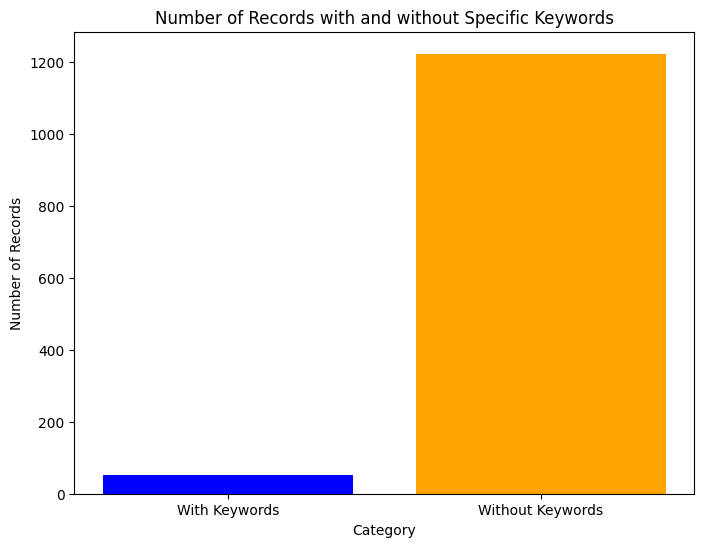

In [ ]:
# Example 6: Display Barplot of records with keywords

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the dataset
zshot_dataset = load_dataset("zeroshot/arxiv-biology", split="train")

# Convert the dataset to a Pandas DataFrame
zshot_df = pd.DataFrame(zshot_dataset)

# Function to filter records by multiple keywords in abstract
def filter_records_by_keywords(dataframe, keywords):
    # Create a regex pattern to match any of the keywords
    pattern = '|'.join(keywords)
    return dataframe[dataframe['abstract'].str.contains(pattern, case=False, na=False)]

# Define the keywords
keywords = ['plant']

# Filter records with the keywords
filtered_records = filter_records_by_keywords(zshot_df, keywords)

# Count the number of records with and without keywords
count_with_keywords = len(filtered_records)
count_without_keywords = len(zshot_df) - count_with_keywords

# Create a bar plot
labels = ['With Keywords', 'Without Keywords']
counts = [count_with_keywords, count_without_keywords]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Number of Records')
plt.title('Number of Records with and without Specific Keywords')
plt.show()


If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image11F.png)

### Example 7: List Keywords by Rank

The code in the cell below extracts keywords from the `title` of each record in the dataset. The code takes advantage of the `Natural Language Toolkit (NKTK)` library to download **stop words**. Stopwords are commonly used words in a language (such as "the," "is," "in," etc.) that are often removed during text processing because they don't carry significant meaning on their own.

A `preprocess_tex(text)` function performs the following functions:

* **Lowercase the Text:** Converts the text to lowercase to ensure uniformity.
* **Remove Punctuation:** Removes punctuation from the text using the str.translate method.
* **Tokenize the Text:** Splits the text into individual words (tokens) using the split method.
* **Remove Stop Words:** Removes common stop words (e.g., "the," "is," "in") using a predefined set from the NLTK library.
* **Return Words:** Returns the list of processed words.

This code snippet:
```text
# Apply preprocessing to titles
zshot_dataset_df['processed_title'] = zshot_dataset_df['title'].apply(preprocess_text)

````
applies the `preprocess_text` function to the title column of the DataFrame and stores the processed words in a new column named `processed_title`.

To get a ranking, we use this code snippet:

~~~text
# Count word frequencies
word_counts = Counter(all_words)
~~~
This code uses the `Counter` class from the `collections module` to count the frequency of each word in the `all_words` list.

In [ ]:
# Example 7; List Keywords by Rank

import pandas as pd
from datasets import load_dataset
import nltk
from collections import Counter
import string

# Download stopwords from nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = text.split()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Apply preprocessing to abstracts
zshot_dataset_df['processed_title'] = zshot_dataset_df['title'].apply(preprocess_text)

# Combine all words in the abstracts into a single list
all_words = [word for title in zshot_dataset_df['processed_title'] for word in title]

# Count word frequencies
word_counts = Counter(all_words)

# Get the most common non-trivial words
most_common_words = word_counts.most_common(20)  # Get the top 20 most common words

# Display the most common words as a list
most_common_words_list = [f"{word}: {count}" for word, count in most_common_words]
for item in most_common_words_list:
    print(item)


analysis: 133
using: 123
data: 110
model: 103
models: 83
networks: 69
learning: 58
based: 55
protein: 52
prediction: 46
systems: 44
approach: 43
modeling: 40
biological: 36
network: 34
dynamics: 33
gene: 33
method: 32
neural: 32
methods: 31


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image13F.png)

### Example 8: Barplot (Revisted)

By inspection of the output above, it would seem that the word `model` or `models` was a common keyword in the titles. The code in the cell below recreats Example 6 but searches for the keywords `model` or `models` on in the title of the paper.

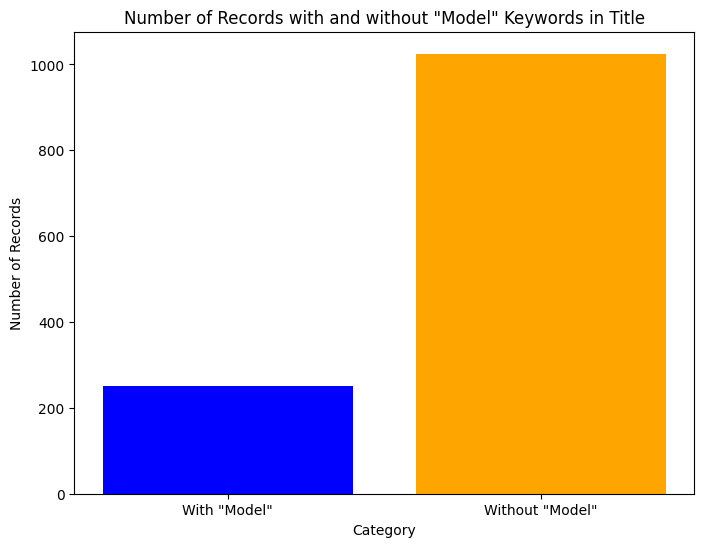

In [ ]:
# Example 8: Barplot


from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# Function to add 'model' label
def label_model(row):
    title = row['title'].lower()
    if 'model' in title or 'models' in title:
        return 1
    else:
        return 0

# Apply the function to add the 'model' label
zshot_dataset_df['model'] = zshot_dataset_df.apply(label_model, axis=1)

# Count the number of records with and without the 'model' label
count_with_model = zshot_dataset_df['model'].sum()
count_without_model = len(zshot_dataset_df) - count_with_model

# Create a bar plot
labels = ['With "Model"', 'Without "Model"']
counts = [count_with_model, count_without_model]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Number of Records')
plt.title('Number of Records with and without "Model" Keywords in Title')
plt.show()


If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image14F.png)

----------------------------------

# **Exercises**

### **Exercise 1 - Step 1: Download a Dataset**

The code in the cell below downloads the `mlfoundations-dev/arxiv_biology_seed_science` dataset. This dataset includes a collection of scientific articles and abstracts related to biology, sourced from the arXiv repository. It is intended to facilitate tasks such as text mining, natural language processing, and machine learning in the field of biology.

The dataset is structured to provide researchers with access to a wide range of biological research papers, enabling them to develop and evaluate models for various applications, including information retrieval, semantic analysis, and knowledge extraction.

In the cell below write the code to store the `mlfoundations-dev/arxiv_biology_seed_science` in the variable `seed_dataset`. This is a relatively large dataset, so downloading with take a few minutes to complete. Please be patient...

In [ ]:
# Insert your code for Exercise 1 here

from datasets import load_dataset

# Specify the dataset repository
dataset_id = "mlfoundations-dev/arxiv_biology_seed_science"

# Download the dataset
seed_dataset = load_dataset(dataset_id)


train-00000-of-00001.parquet:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1277 [00:00<?, ? examples/s]

If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image15F.png)

### **Exercise 2: Display a Record**

In the cell below write the code to display record `100` in your `seed_dataset`.

In [ ]:
# Insert your code for Exercise 2 here

# Specify record number
RECORD_NUMBER = 100

record = seed_dataset['train'][RECORD_NUMBER]

# Display the first few rows to confirm the structure
for key, value in record.items():
    print(f"{key}: {value}\n")


id: 1404.5725

title: Application of signal processing techniques in the assessment of
  clinical risks in preterm infants

abstract: Preterm infants with very low birth weight suffer from a high risk of
intra-ventricular hemorrhage(IVH) and other serious diseases. To improve the
clinical risk assessment of preterm infants and develop potential clinically
makers for the adverse outcome, the first part of the paper develops the
frequency spectral analysis on the non-invasively measured heart rate
variability, blood pressure variability and cerebral near-infrared spectroscopy
measures. Moderate and high correlations with the clinical risk index for
babies were identified from various spectral measures of arterial baroreflex
and cerebral autoregulation functions. It was also observed that the
cross-spectral transfer function analysis of cerebral NIRS and arterial blood
pressure was able to provide a number of parameters that were potentially
useful for distinguishing between preterm infan

If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image16F.png)

### **Exercise 3: Display the labels in order of their index labels**

In the cell below extract the labels (features) of the train dataset and print them out.

In [ ]:
# Insert your code for Exercise 3 here

# Get the labels (features) of the train dataset
labels = seed_dataset['train'].features

# Print the labels
print(labels)


{'id': Value(dtype='string', id=None), 'title': Value(dtype='string', id=None), 'abstract': Value(dtype='string', id=None), 'problem': {'choices': [{'finish_reason': Value(dtype='string', id=None), 'index': Value(dtype='int64', id=None), 'logprobs': Value(dtype='null', id=None), 'message': {'content': Value(dtype='string', id=None), 'refusal': Value(dtype='null', id=None), 'role': Value(dtype='string', id=None)}}], 'created': Value(dtype='int64', id=None), 'id': Value(dtype='string', id=None), 'model': Value(dtype='string', id=None), 'object': Value(dtype='string', id=None), 'service_tier': Value(dtype='string', id=None), 'system_fingerprint': Value(dtype='string', id=None), 'usage': {'completion_tokens': Value(dtype='int64', id=None), 'completion_tokens_details': {'accepted_prediction_tokens': Value(dtype='int64', id=None), 'audio_tokens': Value(dtype='int64', id=None), 'reasoning_tokens': Value(dtype='int64', id=None), 'rejected_prediction_tokens': Value(dtype='int64', id=None)}, 'pr

If the code is correct, you should see the following output:
~~~text
{'id': Value(dtype='string', id=None), 'title': Value(dtype='string', id=None), 'abstract': Value(dtype='string', id=None), 'problem': {'choices': [{'finish_reason': Value(dtype='string', id=None), 'index': Value(dtype='int64', id=None), 'logprobs': Value(dtype='null', id=None), 'message': {'content': Value(dtype='string', id=None), 'refusal': Value(dtype='null', id=None), 'role': Value(dtype='string', id=None)}}], 'created': Value(dtype='int64', id=None), 'id': Value(dtype='string', id=None), 'model': Value(dtype='string', id=None), 'object': Value(dtype='string', id=None), 'service_tier': Value(dtype='string', id=None), 'system_fingerprint': Value(dtype='string', id=None), 'usage': {'completion_tokens': Value(dtype='int64', id=None), 'completion_tokens_details': {'accepted_prediction_tokens': Value(dtype='int64', id=None), 'audio_tokens': Value(dtype='int64', id=None), 'reasoning_tokens': Value(dtype='int64', id=None), 'rejected_prediction_tokens': Value(dtype='int64', id=None)}, 'prompt_tokens': Value(dtype='int64', id=None), 'prompt_tokens_details': {'audio_tokens': Value(dtype='int64', id=None), 'cached_tokens': Value(dtype='int64', id=None)}, 'total_tokens': Value(dtype='int64', id=None)}}, '__original_row_idx': Value(dtype='int64', id=None)}
~~~

Here is a complete list of all of the labels (features) for the records in your `seed_dataset`. As you can see, it's much more comprehensive that the labels in the `zshot_dataset`.

~~~text

{'id': Value(dtype='string', id=None),   
'title': Value(dtype='string', id=None),   
'abstract': Value(dtype='string', id=None),   
'problem': {'choices': [{'finish_reason': Value(dtype='string', id=None),   'index': Value(dtype='int64', id=None),   
'logprobs': Value(dtype='null', id=None),     
'message': {'content': Value(dtype='string', id=None),   
'refusal': Value(dtype='null', id=None),   
'role': Value(dtype='string', id=None)}}],   
'created': Value(dtype='int64', id=None), 'id': Value(dtype='string', id=None),   
'model': Value(dtype='string', id=None), 'object': Value(dtype='string', id=None),   
'service_tier': Value(dtype='string', id=None),   
'system_fingerprint': Value (dtype='string', id=None),     
'usage': {'completion_tokens': Value(dtype='int64', id=None 'completion_tokens_details': {'accepted_prediction_tokens': Value(dtype='int64', id=None),     
'audio_tokens': Value(dtype='int64', id=None),   
'reasoning_tokens': Value(dtype='int64', id=None),     
'rejected_prediction_tokens': Value(dtype='int64', id=None)},   'prompt_tokens': Value(dtype='int64', id=None),   
'prompt_tokens_details': {'audio_tokens': Value(dtype='int64', id=None),     'cached_tokens': Value(dtype='int64', id=None)},
'total_tokens': Value (dtype='int64', id=None)}},   
'__original_row_idx': Value(dtype='int64', id=None)}

~~~

### Example 4: Converting Hugging Face dataset to DataFrame

Hugging face can provide data sets in a variety of formats. The following code shows how to receive the `zshot_dataset` as a Pandas DataFrame.

This code snippet sets the conversion type:
~~~text
zshot_dataset.set_format(type='pandas')
~~~
That line set the format of the dataset to 'pandas'. By setting the format to 'pandas', you can directly convert the dataset to a Pandas DataFrame, which makes it easier to manipulate and analyze the data.

The actual conversion was performed by this code snippet:

~~~text

zshot_dataset_df = zshot_dataset[:]

~~~

That code snippet converts the dataset to a Pandas DataFrame. The slicing notation [:] is used to convert the entire dataset into the DataFrame. The resulting DataFrame is stored in the variable `zshot_dataset_df`.

In [ ]:
# Example 4: Converting Hugging Face dataset to DataFrame

from datasets import load_dataset

# Load the zeroshot/arxiv-biology dataset
seed_dataset = load_dataset("mlfoundations-dev/arxiv_biology_seed_science", split="train")

# Set the format of the dataset to 'pandas'
seed_dataset.set_format(type='pandas')

# Convert the dataset to a pandas DataFrame
seed_dataset_df = seed_dataset[:]

# Display the first 5 records of the DataFrame
print(seed_dataset_df.head(5))


           id                                              title  \
0  1906.03542  Circuitscape in Julia: High Performance Connec...   
1  1501.06896  A maximum likelihood estimate of natural morta...   
2   1412.2788  Fitting and projecting HIV epidemics: Data, st...   
3  1609.02049   Classification of syncope through data analytics   
4   0904.2637  Reducing the noise effects in Logan graphic an...   

                                            abstract  \
0  Connectivity across landscapes influences a wi...   
1  The delay difference model was implemented to ...   
2  Understanding historical trends in the epidemi...   
3  Objective: Syncope is a sudden loss of conscio...   
4  Logan's graphical analysis (LGA) is a widely-u...   

                                             problem  __original_row_idx  
0  {'choices': [{'finish_reason': 'stop', 'index'...                   4  
1  {'choices': [{'finish_reason': 'stop', 'index'...                   0  
2  {'choices': [{'finish_reas

If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image17F.png)

We can use the Pandas "apply" function to add the textual label for each observation.


### **Exercise 5: Search Records Using Keywords**

The code in the cell below show how to retrieve records containing one (or more) **kyewords**. For this example, the `zshot_dataset_df` DataFrame was searched for the keywords 'mitochondria', 'autophage' and 'fasting'.

Here is a brief summary of the code's strategy:

1. **Create Regex Pattern:** The filter_records_by_keywords function creates a regex pattern using the join method to match any of the keywords.

2. **Filter Function:** The filter_records_by_keywords function filters records by checking if any of the keywords are present in the abstract column. The case=False argument makes the search case-insensitive, and na=False handles missing values gracefully.

3. **Filter Records:** Use the filter_records_by_keywords function to extract records with any of the specified keywords in the abstract.

This code allows you to search for multiple keywords in the abstract column and filter the records accordingly.

In [ ]:
# Insert your code for Exercise 5 here

# Function to filter records by multiple keywords in abstract
def filter_records_by_keywords(dataframe, keywords):
    # Create a regex pattern to match any of the keywords
    pattern = '|'.join(keywords)
    return dataframe[dataframe['abstract'].str.contains(pattern, case=False, na=False)]

# Extract records with the keywords
keywords = ['deep learning', 'AI']
filtered_records = filter_records_by_keywords(seed_dataset_df, keywords)

# Display the filtered records
print(filtered_records)


              id                                              title  \
0     1906.03542  Circuitscape in Julia: High Performance Connec...   
2      1412.2788  Fitting and projecting HIV epidemics: Data, st...   
3     1609.02049   Classification of syncope through data analytics   
4      0904.2637  Reducing the noise effects in Logan graphic an...   
5     2107.00578  Uncertainty quantification of a thrombosis mod...   
...          ...                                                ...   
1272  1707.08233  Accurate Chemical Master Equation Solution Usi...   
1273  2002.06391  Single-cell entropy to quantify the cellular t...   
1274  1604.06783  PyPanda: a Python Package for Gene Regulatory ...   
1275  2208.00684  Choice of spatial discretisation influences th...   
1276  2104.01468  Neural Representations of Cryo-EM Maps and a G...   

                                               abstract  \
0     Connectivity across landscapes influences a wi...   
2     Understanding historica

If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image18F.png)

### **Exercise 6: Display Barplot of Records with Keywords**

According to the output above, only 6 records in the `zshot_dataset` included the keywords  'mitochondria', 'autophage' and 'fasting'. One way to get an idea of how popular a topic is represented in a particular dataswet is to generate a barplot of the numbers of records with, and without the keywords.

The code in the cell below shows how to generate such a barplot.

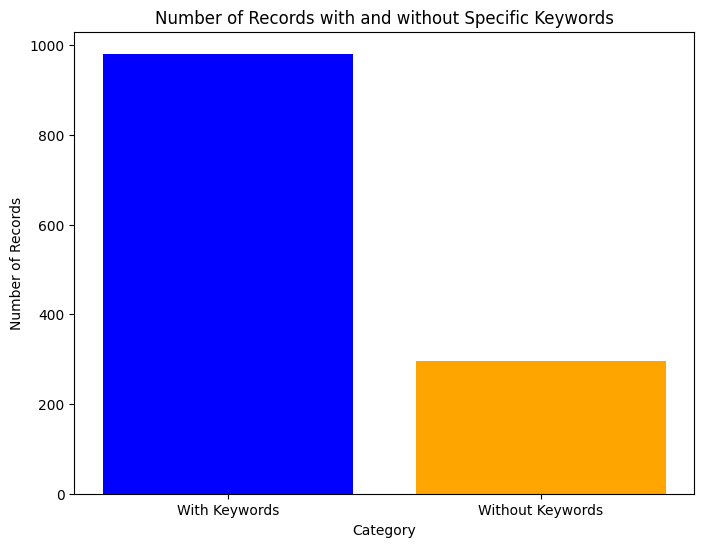

In [ ]:
# Insert your code for Exercise 6 here

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the zeroshot/arxiv-biology dataset
seed_dataset = load_dataset("mlfoundations-dev/arxiv_biology_seed_science", split="train")

# Convert the dataset to a Pandas DataFrame
seed_dataset_df = pd.DataFrame(seed_dataset)

# Function to filter records by multiple keywords in abstract
def filter_records_by_keywords(dataframe, keywords):
    # Create a regex pattern to match any of the keywords
    pattern = '|'.join(keywords)
    return dataframe[dataframe['abstract'].str.contains(pattern, case=False, na=False)]

# Define the keywords
keywords = ['deep learning', 'AI']

# Filter records with the keywords
filtered_records = filter_records_by_keywords(seed_dataset_df, keywords)

# Count the number of records with and without keywords
count_with_keywords = len(filtered_records)
count_without_keywords = len(seed_dataset_df) - count_with_keywords

# Create a bar plot
labels = ['With Keywords', 'Without Keywords']
counts = [count_with_keywords, count_without_keywords]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Number of Records')
plt.title('Number of Records with and without Specific Keywords')
plt.show()


If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image11F.png)

### Example 7: List Keywords by Rank

The code in the cell below extracts keywords from the `title` of each record in the dataset. The code takes advantage of the `Natural Language Toolkit (NKTK)` library to download **stop words**. Stopwords are commonly used words in a language (such as "the," "is," "in," etc.) that are often removed during text processing because they don't carry significant meaning on their own.

A `preprocess_tex(text)` function performs the following functions:

* **Lowercase the Text:** Converts the text to lowercase to ensure uniformity.
* **Remove Punctuation:** Removes punctuation from the text using the str.translate method.
* **Tokenize the Text:** Splits the text into individual words (tokens) using the split method.
* **Remove Stop Words:** Removes common stop words (e.g., "the," "is," "in") using a predefined set from the NLTK library.
* **Return Words:** Returns the list of processed words.

This code snippet:
```text
# Apply preprocessing to titles
zshot_dataset_df['processed_title'] = zshot_dataset_df['title'].apply(preprocess_text)

````
applies the `preprocess_text` function to the title column of the DataFrame and stores the processed words in a new column named `processed_title`.

To get a ranking, we use this code snippet:

~~~text
# Count word frequencies
word_counts = Counter(all_words)
~~~
This code uses the `Counter` class from the `collections module` to count the frequency of each word in the `all_words` list.

In [ ]:
# Example 7; List Keywords by Rank

import pandas as pd
from datasets import load_dataset
import nltk
from collections import Counter
import string

# Download stopwords from nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = text.split()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Apply preprocessing to abstracts
zshot_dataset_df['processed_title'] = zshot_dataset_df['title'].apply(preprocess_text)

# Combine all words in the abstracts into a single list
all_words = [word for title in zshot_dataset_df['processed_title'] for word in title]

# Count word frequencies
word_counts = Counter(all_words)

# Get the most common non-trivial words
most_common_words = word_counts.most_common(20)  # Get the top 20 most common words

# Display the most common words as a list
most_common_words_list = [f"{word}: {count}" for word, count in most_common_words]
for item in most_common_words_list:
    print(item)


analysis: 133
using: 123
data: 110
model: 103
models: 83
networks: 69
learning: 58
based: 55
protein: 52
prediction: 46
systems: 44
approach: 43
modeling: 40
biological: 36
network: 34
dynamics: 33
gene: 33
method: 32
neural: 32
methods: 31


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image13F.png)

### Example 8: Barplot (Revisted)

By inspection of the output above, it would seem that the word `model` or `models` was a common keyword in the titles. The code in the cell below recreats Example 6 but searches for the keywords `model` or `models` on in the title of the paper.

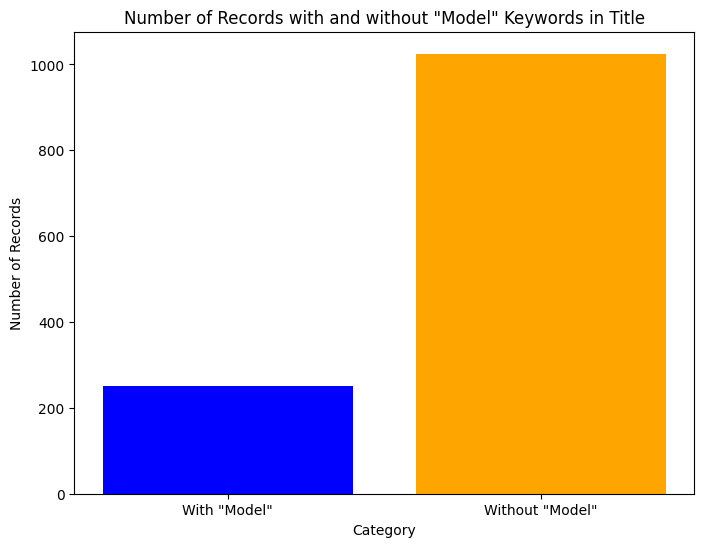

In [ ]:
# Example 8: Barplot


from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# Function to add 'model' label
def label_model(row):
    title = row['title'].lower()
    if 'model' in title or 'models' in title:
        return 1
    else:
        return 0

# Apply the function to add the 'model' label
zshot_dataset_df['model'] = zshot_dataset_df.apply(label_model, axis=1)

# Count the number of records with and without the 'model' label
count_with_model = zshot_dataset_df['model'].sum()
count_without_model = len(zshot_dataset_df) - count_with_model

# Create a bar plot
labels = ['With "Model"', 'Without "Model"']
counts = [count_with_model, count_without_model]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Number of Records')
plt.title('Number of Records with and without "Model" Keywords in Title')
plt.show()


If the code is correct, you should see something similar to the following output:

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_3_image14F.png)

A quick scan of the downloaded data set reveals its structure. In this case, the sequence data was already separated into training, validation, and test data sets. The training set consists of `498444` observations, while the validation set contains `7784` observations and the test set contains `8469` observations. The dataset is a Python dictionary that includes a Dataset object for each of these three divisions. The dataset contains four columns, the `sequence`, the `chromosome`, the `start_pos` and the `end_pos`for each gene sequence.


## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_05_3.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Lizard Tail**

## **Sol-20**

![__](https://upload.wikimedia.org/wikipedia/commons/5/5e/Processor_Technology_SOL_20_Computer.jpg)


The **Sol-20** was the first fully assembled microcomputer with a built-in keyboard and television output, what would later be known as a home computer. The design was the integration of an Intel 8080-based motherboard, a VDM-1 graphics card, the 3P+S I/O card to drive a keyboard, and circuitry to connect to a cassette deck for program storage. Additional expansion was available via five S-100 bus slots inside the machine. It also included swappable ROMs that the manufacturer called 'personality modules', containing a rudimentary operating system.

The design was originally suggested by Les Solomon, the editor of Popular Electronics. He asked Bob Marsh of Processor Technology if he could design a smart terminal for use with the Altair 8800. Lee Felsenstein, who shared a garage working space with Marsh, had previously designed such a terminal but never built it. Reconsidering the design using modern electronics, they agreed the best solution was to build a complete computer with a terminal program in ROM. Felsenstein suggested the name "Sol" because they were including "the wisdom of Solomon" in the box.

The Sol appeared on the cover of the July 1976 issue of Popular Electronics as a "high-quality intelligent terminal". It was initially offered in three versions; the Sol-PC motherboard in kit form, the Sol-10 without expansion slots, and the Sol-20 with five slots.

A Sol-20 was taken to the Personal Computing Show in Atlantic City in August 1976 where it was a hit, building an order backlog that took a year to fill. Systems began shipping late that year and were dominated by the expandable Sol-20, which sold for \$1,495 in its most basic fully-assembled form. The company also offered schematics for the system for free for those interested in building their own.

The Sol-20 remained in production until 1979, by which point about 12,000 machines had been sold. By that time, the "1977 trinity" —the Apple II, Commodore PET and TRS-80— had begun to take over the market, and a series of failed new product introductions drove Processor Technology into bankruptcy. Felsenstein later developed the successful Osborne 1 computer, using much the same underlying design in a portable format.

### **History**

**Tom Swift Terminal**

Lee Felsenstein was one of the sysops of Community Memory, the first public bulletin board system. Community Memory opened in 1973, running on a SDS 940 mainframe that was accessed through a Teletype Model 33, essentially a computer printer and keyboard, in a record store in Berkeley, California. The cost of running the system was untenable; the teletype normally cost \$1,500 (their first example was donated from Tymshare as junk), the modem another \$300, and time on the SDS was expensive - in 1968, Tymshare charged \$13 per hour (equivalent to \$114 in 2023). Even the reams of paper output from the terminal were too expensive to be practical and the system jammed all the time. The replacement of the Model 33 with a Hazeltine glass terminal helped, but it required constant repairs.

Since 1973, Felsenstein had been looking for ways to lower the cost. One of his earliest designs in the computer field was the Pennywhistle modem, a 300 bits per second acoustic coupler that was the cost of commercial models. When he saw Don Lancaster's TV Typewriter on the cover of the September 1973 Radio Electronics, he began adapting its circuitry as the basis for a design he called the Tom Swift Terminal. The terminal was deliberately designed to allow it to be easily repaired. Combined with the Pennywhistle, users would have a cost-effective way to access Community Memory.

In January 1975, Felsenstein saw a post on Community Memory by Bob Marsh asking if anyone would like to share a garage. Marsh was designing a fancy wood-cased digital clock and needed space to work on it. Felsenstein had previously met Marsh at school and agreed to split the \$175 rent on a garage in Berkeley. Shortly after, Community Memory shut down for the last time, having burned out the relationship with its primary funding source, Project One, as well the energy of its founding members.

**Processor Technology**

January 1975 was also the month that the Altair 8800 appeared on the front page of Popular Electronics, sparking off intense interest among the engineers of the rapidly growing Silicon Valley. Shortly thereafter, on 5 March 1975, Gordon French and Fred Moore held the first meeting of what would become the Homebrew Computer Club. Felsenstein took Marsh to one of the meetings, Marsh saw an opportunity supplying add-on cards for the Altair, and in April, he formed Processor Technology with his friend Gary Ingram.

The new company's first product was a 4 kB DRAM memory card for the Altair. A similar card was already available from the Altair's designers, MITS, but it was almost impossible to get working properly. Marsh began offering Felsenstein contracts to draw schematics or write manuals for the products they planned to introduce. Felsenstein was still working on the terminal as well, and in July, Marsh offered to pay him to develop the video portion. This was essentially a version of the terminal where the data would be supplied by the main memory of the Altair rather than a serial port.

The result was the VDM-1, the first graphics card. The VDM-1 could display 16 lines of 64 characters per line, and included the complete ASCII character set with upper- and lower-case characters and a number of graphics characters like arrows and basic math symbols. An Altair equipped with a VDM-1 for output and Processor Technology's 3P+S card running a keyboard for input removed the need for a terminal, yet cost less than dedicated smart terminals like the Hazeltine.

**Intelligent terminal concept**

Before the VDM-1 was launched in late 1975, the only way to program the Altair was through its front-panel switches and LED lamps, or by purchasing a serial card and using a terminal of some sort. This was typically a Model 33, which still cost \$1,500 if available. Normally the teletypes were not available – Teletype Corporation typically sold them only to large commercial customers, which led to a thriving market for broken-down machines that could be repaired and sold into the microcomputer market. Ed Roberts, who had developed the Altair, eventually arranged a deal with Teletype to supply refurbished Model 33s to MITS customers who had bought an Altair.

Les Solomon, whose Popular Electronics magazine launched the Altair, felt a low-cost smart terminal would be highly desirable in the rapidly expanding microcomputer market. In December 1975, Solomon traveled to Phoenix to meet with Don Lancaster to ask about using his TV Typewriter as a video display in a terminal. Lancaster seemed interested, so Solomon took him to Albuquerque to meet Roberts. The two immediately began arguing when Lancaster criticized the design of the Altair and suggested changes to better support expansion cards, demands that Roberts flatly refused. Any hopes of a partnership disappeared.
